# Compound Polarity Analysis with vaderSentiment - Financial News Sentiment - Clustering

Similar to part 3.2, this notebook utilizes clustering method, an unsupervised learning method of grouping data, to put each article into their respective group of sentiment.

## CNBC data

For CNBC dataset, I use the 2 most popular clustering algorithms, K-Means Clustering and Hierarchical clustering, to categorized the sentiments of CNBC articles.

In [1]:
%store -r vader_df1
X = vader_df1.iloc[:, -2:].values

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

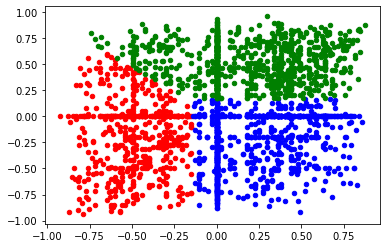

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)

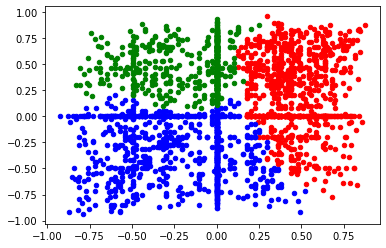

In [5]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

Assessing both K-Means and Hierarchical clusters, I can see 2 different ways these clustering algorithm group given data points. In order to minimize the amount of neutral sentiments, I decided to go with Hierarchical Clustering for this data since it creates significantly less neutral sentiments

From the scatter plot, I can conclude that data points colored in red (y=0) represent positive sentiment, data points colored in blue (y=1) represent negative sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [6]:
c_sentiments = [2 if y == 0 else 1 if y == 1 else 0 for y in y_hc3]
c_sentiments[0:10]

[2, 1, 0, 2, 1, 1, 1, 1, 1, 0]

In [7]:
# Saving vaderSentiment sentiments
%store -r final_df1
final_df1['vs_sentiment'] = c_sentiments
%store final_df1

Stored 'final_df1' (DataFrame)


# Reuters data

In [8]:
%store -r vader_df2
X = vader_df2.iloc[:, -2:].values

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

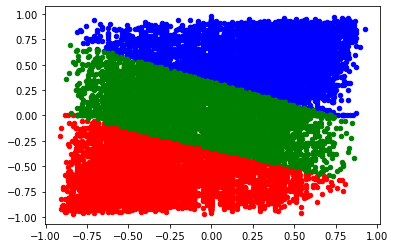

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [12]:
# My device does not have sufficient memory for this model
# hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [13]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

Again, for this dataset, both K-Means and Hierarchical clusters create a different way of grouping given data points. Knowing that the y-axis contains the preview of the article, it is possible that many articles have negative headlines, but carry positive information about the financial world nonetheless. Coupled with the effort to minimize the amount of neutral sentiments, I decided to go with K-Means Clustering for this data since it creates significantly less neutral sentiments

From the scatter plot, I can conclude that data points colored in blue (y=1) represent positive sentiment, data points colored in red (y=0) represent negative sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [14]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
r_sentiments = [2 if y == 1 else 1 if y == 2 else 0 for y in y_kmeans]
r_sentiments[0:10]

[1, 0, 0, 1, 0, 0, 1, 1, 0, 2]

In [15]:
# Saving vaderSentiment sentiments
%store -r final_df2
final_df2['vs_sentiment'] = r_sentiments
%store final_df2

Stored 'final_df2' (DataFrame)


# The Guardian data

Similar to part 3.2, instead of applying a clustering model, I apply a Natural Breaks Optimization to this dataset, specifically Jenks Natural Breaks.

In [16]:
%store -r vader_df3
X = vader_df3.iloc[:, -1:].values

c:\users\long's xps13\appdata\local\programs\python\python38\lib\site-packages\jenkspy\core.py:64: UserWarning: Invalid values encountered (NaN or Inf) were ignored
  warnings.warn('Invalid values encountered (NaN or Inf) were ignored')


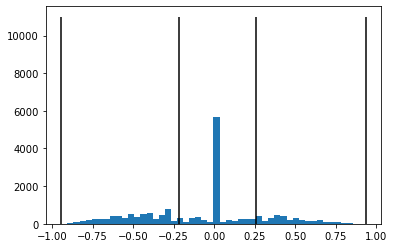

In [17]:
import jenkspy
breaks = jenkspy.jenks_breaks(X, nb_class=3)
plt.hist(X, bins = 50)
for b in breaks:
    plt.vlines(b, ymin=0, ymax=11000)

In [18]:
breaks

[-0.9432, -0.2158, 0.2584, 0.9354]

From the histogram, I can conclude that data points with sentiments below -0.2158 represent negative sentiment, data points with sentiments above 0.2584 represent positive sentiment, and data points with sentiments in between those 2 values represent neutral sentiment

In [19]:
g_sentiments = [0 if x <= breaks[1] else 2 if x >= breaks[2] else 1 for x in X]
g_sentiments[0:10]

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [20]:
# Saving textblob sentiments
%store -r final_df3
final_df3['vs_sentiment'] = g_sentiments
%store final_df3

Stored 'final_df3' (DataFrame)
